In [1]:
from Portefeuille import Portfeuille
from PM_strategy import CRP,BHP
import seaborn as sns
import numpy as np 
import pandas as pd
import datetime
import matplotlib.pyplot as plt

SYMBOLS = ['ETHBTC','XRPBTC','EOSBTC','LTCBTC','ZECBTC','ETCBTC','XMRBTC']
START = datetime.datetime(2017,8,1)
END = datetime.datetime(2020,4,1)
Port = Portfeuille(SYMBOLS,START,END)


In [2]:
y = CRP(Port.df_normalized,START,END)
CRP_cum_return = np.cumprod(y) - 1
y2= BHP(Port.df_normalized,START,END)
HBP_cum_return = np.cumprod(y2) - 1
x = pd.date_range(start=START,end=END,freq='30min')

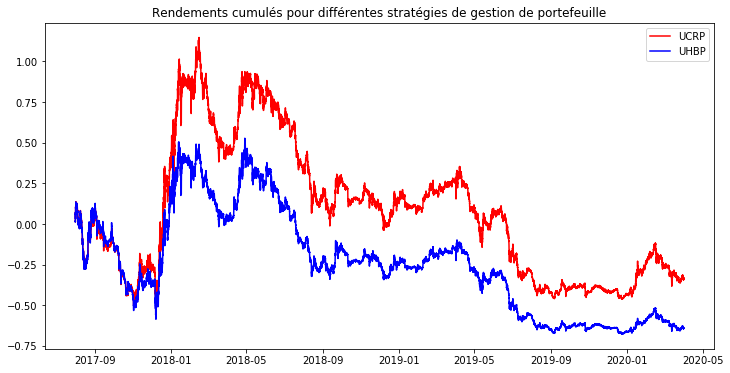

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(x=x,y=CRP_cum_return,color = 'red')
sns.lineplot(x=x,y=HBP_cum_return,color = 'blue')
plt.legend(('UCRP','UHBP'),loc='upper right')
plt.title('Rendements cumulés pour différentes stratégies de gestion de portefeuille')
plt.show()

In [9]:
from universal import tools
from universal import algos

In [3]:
algo = algos.OLMAR(window=5, eps=10)

In [4]:
result = algo.run(Port.df_close)
result.fee = 0.002

Summary:
    Profit factor: 1.48
    Sharpe ratio: 14.66
    Information ratio (wrt UCRP): 18.76
    UCRP sharpe: -0.23
    Beta / Alpha: 1.10 / 23.563%
    Annualized return: 755023571.33%
    Annualized volatility: 108.31%
    Longest drawdown: 13 days
    Max drawdown: 28.19%
    Winning days: 57.6%
    Turnover: 55011.4
        


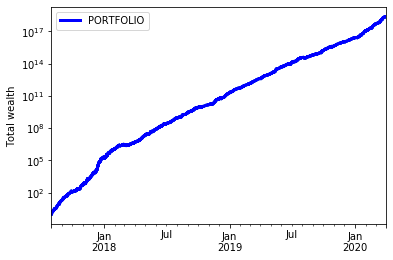

In [11]:
print(result.summary())
result.plot(weights=False, assets=False, ucrp=False, logy=True)

In [24]:
Port.df_close['ix']=Port.df_close.index